In [33]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import h5py
%matplotlib inline

mat_names = glob.glob('./project_datasets/*.mat')
# each test subject got a different file - 9 test subjects
print(mat_names)

['./project_datasets/A07T_slice.mat', './project_datasets/A02T_slice.mat', './project_datasets/A05T_slice.mat', './project_datasets/A08T_slice.mat', './project_datasets/A03T_slice.mat', './project_datasets/A06T_slice.mat', './project_datasets/A01T_slice.mat', './project_datasets/A04T_slice.mat', './project_datasets/A09T_slice.mat']


In [14]:
matfile = h5py.File(mat_names[0], 'r')
print(matfile.keys()) #image and type

[u'image', u'type']


In [62]:
image_mat = matfile['image']
image_shape = image_mat.shape # 288 (48x6) trials across 25 electrodes for 1000 time points (250Hz*4s)
print image_shape

(288, 25, 1000)


In [63]:
type_mat = matfile['type']
type_shape = type_mat.shape
print type_shape
# plt.plot(type_mat[0,:288]) # gets the significant values of types
# all the 0's occur after 288, and are meaningless I think
# so the image_mat, which has shape (288, 25, 1000) should correspond
# to the first 288 entries of type_mat, so
# for a single subject, training data should be image_mat, with 288 samples, each sample has shape (25, 1000)
# and our target label matrix should be type_mat[:288] (or 287?)

(1, 1000)


In [126]:
nans = np.sum(np.isnan(image_mat[:,:]))
print(nans) #No NaN in the data

0


In [123]:
type_set = set(type_mat[0,:])
print(type_set) 

set([0.0, 769.0, 770.0, 771.0, 772.0])


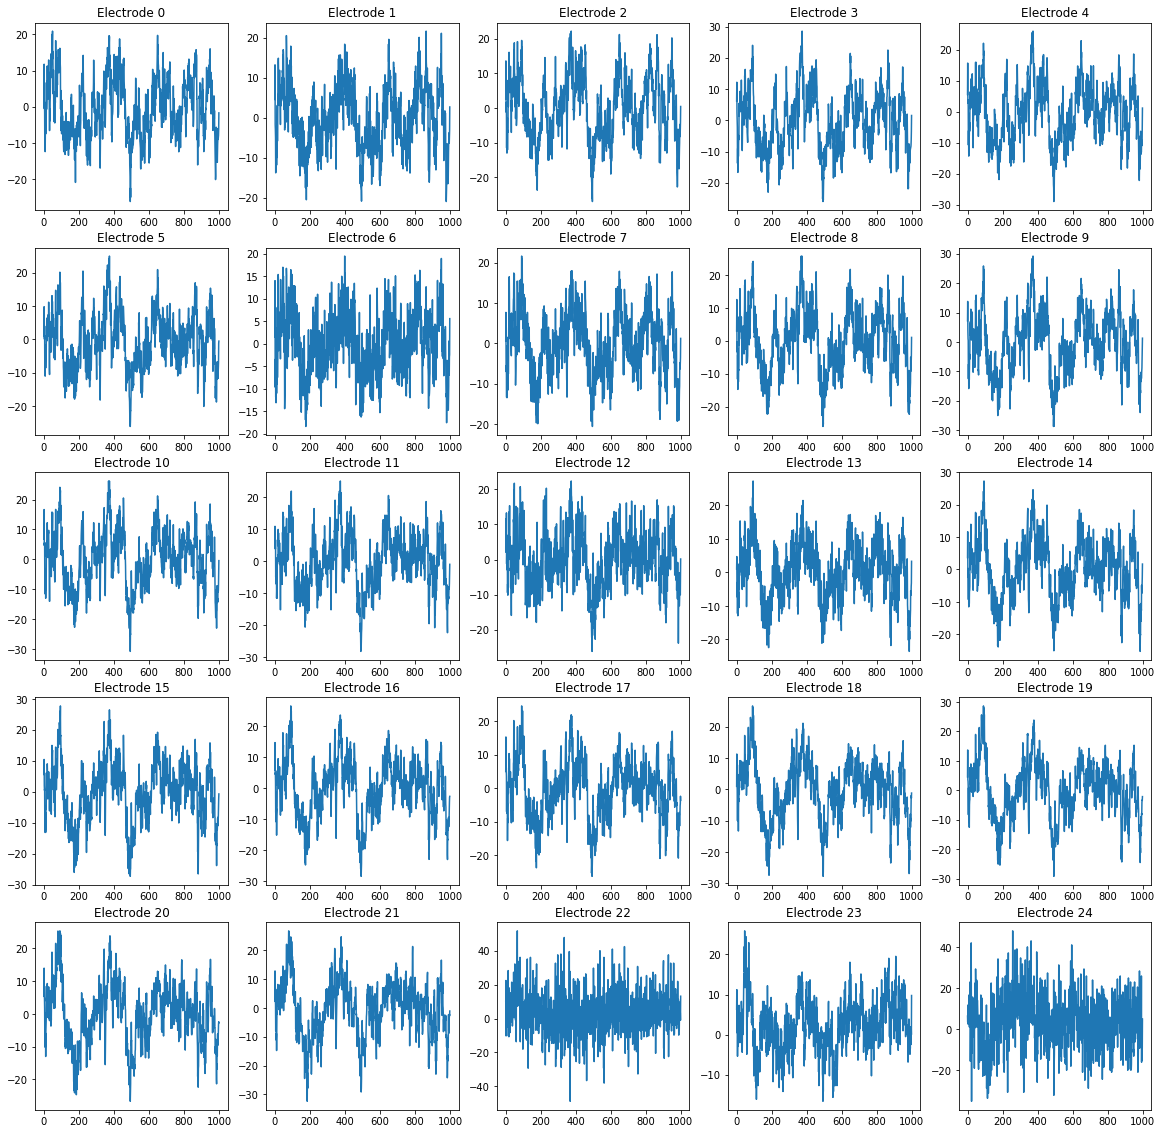

In [64]:
for i in range(image_shape[1]):
    plt.subplot(image_shape[1]**0.5,image_shape[1]**0.5,i+1)
    plt.plot(matfile['image'][0,i,:])
    plt.title("Electrode " + str(i))
    plt.rcParams["figure.figsize"] = [20,20]

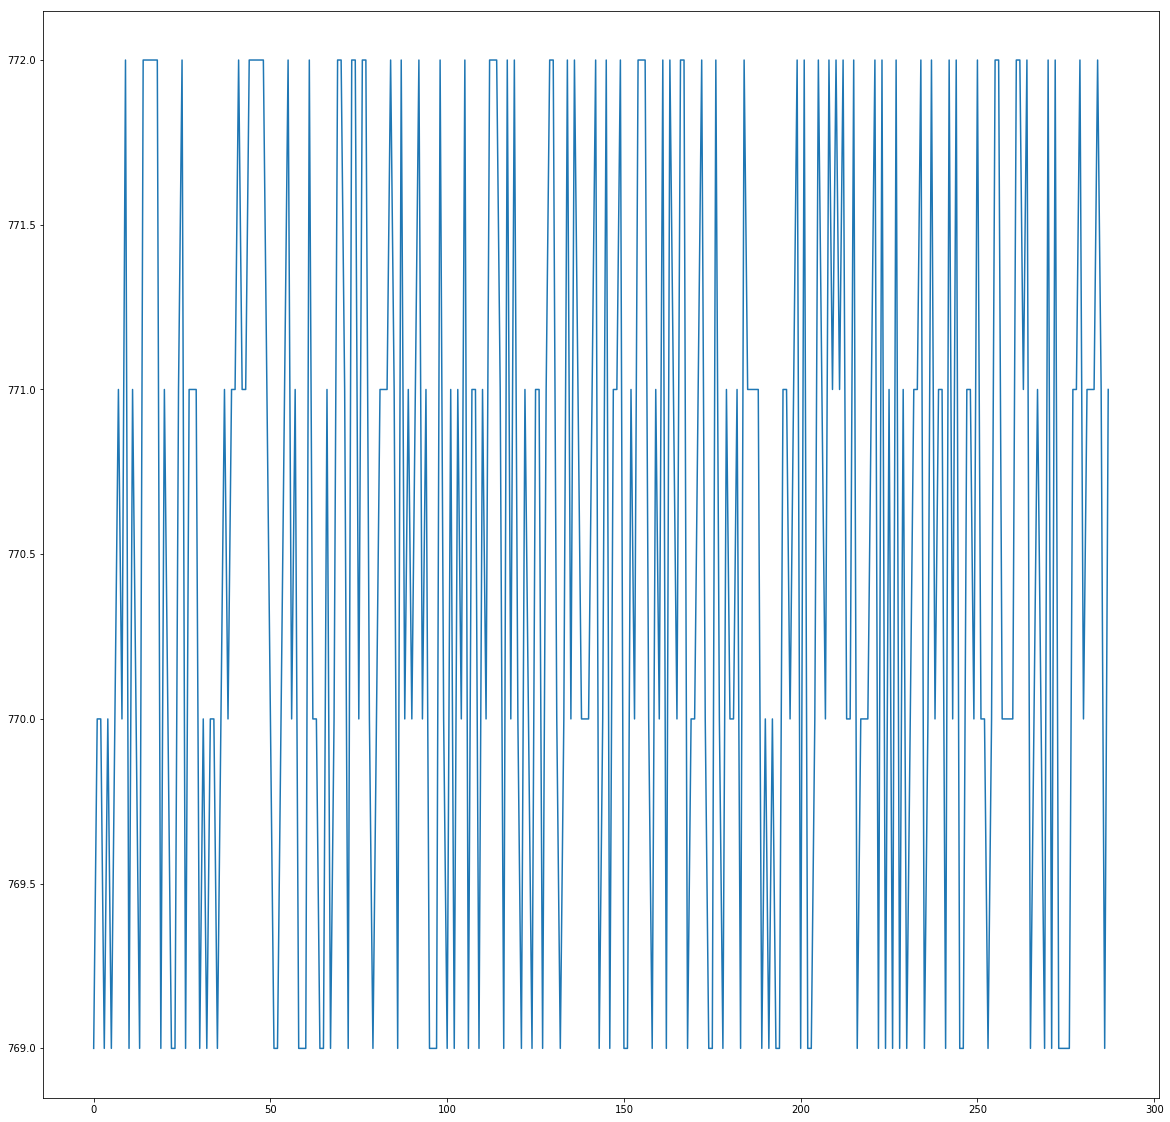

In [66]:
plt.plot(matfile['type'][0,:image_shape[0]])

In [160]:
EEG_channels = 22 #from project guidelines
test_count = 50 #from project guideline, 238 for train-validation and 50 for test
validation_count = 38 # 38 points in validation set and remaining 200 points in test set

In [170]:
#setting seed
np.random.seed(seed=1337)
test_picked = np.random.choice(image_shape[0], test_count, replace=False)
train_val_picked = np.setdiff1d(np.arange(image_shape[0]), test_picked)
val_picked = train_val_picked[:validation_count]
train_picked = train_val_picked[validation_count:]

In [172]:
trainval_data_X = []
training_data_X = []
validation_data_X = []
test_data_X = []

trainval_data_Y = []
training_data_Y = []
validation_data_Y = []
test_data_Y = []

for i in range(len(mat_names)):
    matfile = h5py.File(mat_names[i], 'r')
    
    trainval_data_X.append(matfile['image'][sorted(train_val_picked),:EEG_channels,:])
    training_data_X.append(matfile['image'][sorted(train_picked),:EEG_channels,:])
    validation_data_X.append(matfile['image'][sorted(val_picked),:EEG_channels,:])
    test_data_X.append(matfile['image'][sorted(test_picked),:EEG_channels,:])
    
    trainval_data_Y.append(matfile['type'][0,sorted(train_val_picked)])
    training_data_Y.append(matfile['type'][0,sorted(train_picked)])
    validation_data_Y.append(matfile['type'][0,sorted(val_picked)])
    test_data_Y.append(matfile['type'][0,sorted(test_picked)])

In [173]:
for i in range(len(mat_names)):
    assert(set(training_data_Y[i]) == set(validation_data_Y[i])) #check whether we have data for all labels 
    assert(set(training_data_Y[i]) == set(test_data_Y[i])) #check whether we have data for all labels 

In [174]:
training_data_shape = training_data_X[0].shape
print(training_data_shape) #(200, 22, 1000) while test data shape is (50, 22, 1000) and validation data is (38, 22,1000)

(200, 22, 1000)
